# 심박수가 0인경우 모두 삭제

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib 
from matplotlib import font_manager, rc 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib 
from matplotlib import font_manager, rc 
from pandas import Series, DataFrame
import datetime
import matplotlib 
from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name( ) 
rc('font', family = font_name) 
matplotlib.rcParams['axes.unicode_minus'] = False


In [3]:
da060118= pd.read_csv('D:/CSV/2022/DAY/2200128.csv',sep = ",")

FileNotFoundError: [Errno 2] No such file or directory: 'D:/CSV/2022/DAY/2200128.csv'

In [9]:
da060118['Name']

0                         ID
1          ea:b6:95:6c:e4:38
2          d7:d9:d9:20:29:e8
3          cd:16:d0:eb:87:2b
4          cc:1c:82:82:3f:60
                 ...        
1658897    f7:21:50:97:c9:1d
1658898    d8:29:7d:fa:6a:9f
1658899    fb:0e:d0:48:63:fb
1658900    d4:c0:fc:21:e3:f0
1658901    cb:71:72:65:d7:ea
Name: Name, Length: 1658902, dtype: object

In [5]:
a=da060118['ID'].unique()
for i in range(0,len(a)):
    da060118['ID']=da060118['ID'].replace(a[i],a[i][:2]+a[i][-2:],regex=True)

    da060118['ID'].unique()

In [6]:
a=da060118[da060118['ID'].str.contains('c83a')]
a=a.reset_index()

# sc와hr의 값이 모두 0일경우 삭제 - 등원하지 않았을때의 경우를 삭제
for i in range(0,len(a)-1):
    if (a['StepCount'][i]==0 & a['HeartRate'][i]==0) & (a['HeartRate'][i+1]==0 & a['StepCount'][i+1]==0):
        a.drop(index=[i],axis=0,inplace=True)  
        
# 중복데이터 제거
a.drop_duplicates(subset=None, keep='last', inplace=False, ignore_index=False)
# 누적걸음수 -> 현재걸음수
a=a.reset_index(drop=True)
# 날이 같을 경우에만 stepcount의 값을 앞값으로 채움
for i in range(0,len(a)-1):
    if (a['Day'][i]==a['Day'][i+1])and(a['StepCount'][i]==0 & a['HeartRate'][i] != 0):
        a['StepCount']=a['StepCount'].replace(0, np.NaN)
        a['StepCount']=a['StepCount'].fillna(method='ffill')
        a.reset_index()
        a['StepCount']=a['StepCount'].fillna(0)
        a['StepCount'][1]
# 누적걸음수 -> 현재걸음수
a['sc_']=a['StepCount']
for i in range(0,len(a)-1):
    if a['Day'][i]==a['Day'][i+1] and a['StepCount'][i]<=a['StepCount'][i+1]:
        a['sc_'][i+1]=int(a['StepCount'][i+1])-int(a['StepCount'][i]) 

# 초기화가 안된경우 1. 어제데이터가 연결되어 있는 경우 
# > stepcount[0]의 값이 != 0
# 초기화가 안된경우 2. 0의 값이였다 스마트밴드를 착용함과 동시에 매우 높은 숫자가 찍히는 경우
# > heartrate[1] != 0 and stepcount[1] >= 500 - 이 숫자에 대해선 검토가 필요
a['Date'] = pd.to_datetime(a['Date'])
date_=a['Date'].dt.day.unique()
ind=[]
for i in range(0,len(date_)):[InternetShortcut]
    a['Date'] = pd.to_datetime(a['Date'])
    step_=a.loc[a['Date'].dt.day==date_[i]]
    step_=step_.reset_index()
    
    date_=a['Date'].dt.day.unique()
ind=[]
for i in range(0,len(date_)):
    a['Date'] = pd.to_datetime(a['Date'])
    step_=a.loc[a['Date'].dt.day==date_[i]]
    step_=step_.reset_index()
    if len(step_)>1:
        #초기화가 안된경우 1
        if (step_['StepCount'][0] != 0):
            ind.append(step_['level_0'][0])
for i in range(0,len(ind)):
    a['sc_'][ind[i]]=0
ind=[]
# 따로 진행 - 둘다 중복의 경우를 생각
for i in range(0,len(ind)):
    a['sc_'][ind[i]]=0
    #초기화가 안된경우 2
    if len(step_)>1:
        if (step_['StepCount'][0] >= 480):
            ind.append(step_['level_0'][0]) 
for i in range(0,len(ind)):
    a['sc_'][ind[i]]=0
a.loc[a['Date'].dt.day==2]

IndentationError: unexpected indent (<ipython-input-6-32737956f4da>, line 35)

In [5]:
# 따로 진행 - 둘다 중복의 경우를 생각
for i in range(0,len(ind)):
    a['sc_'][ind[i]]=0
    #초기화가 안된경우 2
    if len(step_)>1:
        if (step_['StepCount'][1] >= 480):
            ind.append(step_['level_0'][1]) 
for i in range(0,len(ind)):
    a['sc_'][ind[i]]=0
a.loc[a['Date'].dt.day==2]
my_m=a.set_index('Date')
my_m=my_m.between_time('10:00','16:00')
my_m=my_m.reset_index()
my_m.loc[my_m['Date'].dt.day==2]

SyntaxError: unexpected EOF while parsing (<ipython-input-5-e509b05dd648>, line 14)

In [9]:
a=da060118[da060118['ID'].str.contains('c83a')]
a=a.reset_index()

# sc와hr의 값이 모두 0일경우 삭제 - 등원하지 않았을때의 경우를 삭제
for i in range(0,len(a)-1):
    if (a['StepCount'][i]==0 & a['HeartRate'][i]==0) & (a['HeartRate'][i+1]==0 & a['StepCount'][i+1]==0):
        a.drop(index=[i],axis=0,inplace=True)  
# 누적걸음수 -> 현재걸음수
a=a.reset_index(drop=True)
# 날이 같을 경우에만 stepcount의 값을 앞값으로 채움
for i in range(0,len(a)-1):
    if (a['Day'][i]==a['Day'][i+1])and(a['StepCount'][i]==0 & a['HeartRate'][i] != 0):
        a['StepCount']=a['StepCount'].replace(0, np.NaN)
        a['StepCount']=a['StepCount'].fillna(method='ffill')
        a.reset_index()
        a['StepCount']=a['StepCount'].fillna(0)
        a['StepCount'][1]
# 누적걸음수 -> 현재걸음수
a['sc_']=a['StepCount']
for i in range(0,len(a)-1):
    if a['Day'][i]==a['Day'][i+1] and a['StepCount'][i]<=a['StepCount'][i+1]:
        a['sc_'][i+1]=int(a['StepCount'][i+1])-int(a['StepCount'][i]) 

# 초기화가 안된경우 1. 어제데이터가 연결되어 있는 경우 
# > stepcount[0]의 값이 != 0
# 초기화가 안된경우 2. 0의 값이였다 스마트밴드를 착용함과 동시에 매우 높은 숫자가 찍히는 경우
# > heartrate[1] != 0 and stepcount[1] >= 500 - 이 숫자에 대해선 검토가 필요
a['Date'] = pd.to_datetime(a['Date'])
date_=a['Date'].dt.day.unique()
ind=[]
for i in range(0,len(date_)):
    a['Date'] = pd.to_datetime(a['Date'])
    step_=a.loc[a['Date'].dt.day==date_[i]]
    step_=step_.reset_index()
    
    date_=a['Date'].dt.day.unique()
ind=[]
for i in range(0,len(date_)):
    a['Date'] = pd.to_datetime(a['Date'])
    step_=a.loc[a['Date'].dt.day==date_[i]]
    step_=step_.reset_index()
    if len(step_)>1:
        #초기화가 안된경우 1
        if (step_['StepCount'][0] != 0):
            ind.append(step_['level_0'][0])
for i in range(0,len(ind)):
    a['sc_'][ind[i]]=0
ind=[]
# 따로 진행 - 둘다 중복의 경우를 생각
for i in range(0,len(ind)):
    a['sc_'][ind[i]]=0
    #초기화가 안된경우 2
    if len(step_)>1:
        if (step_['StepCount'][1] >= 480):
            ind.append(step_['level_0'][1]) 
for i in range(0,len(ind)):
    a['sc_'][ind[i]]=0

# 날짜별로 원하는 시간대로 분할
dam=a
dam['Date'] = pd.to_datetime(dam['Date'])
dam['HeartRate']=dam['HeartRate'].replace(0,np.NaN)
dam=dam.dropna()
dam.reset_index()
da=[]
for i in range(0,len(date_)):
    globals()['da_m'+str(i)]=dam.loc[dam['Date'].dt.day==date_[i]]
    globals()['da_m'+str(i)]=globals()['da_m'+str(i)].set_index('Date')
    #globals()['da_m'+str(i)]=globals()['da_m'+str(i)].resample('10T').mean()
    globals()['da_m'+str(i)]=globals()['da_m'+str(i)].replace(0, np.NaN)
    globals()['da_m'+str(i)]=globals()['da_m'+str(i)].interpolate(method='linear',limit_direction='both')
    globals()['da_m'+str(i)]=globals()['da_m'+str(i)].reset_index()
    da.append(globals()['da_m'+str(i)])
    # 다시 합
    my_m = pd.concat(da)
#10~16시 범위내 
my_m=my_m.set_index('Date')
my_m=my_m.between_time('10:00','16:00')
my_m=my_m.reset_index()
# 값 삭제 및 채우기
my_m['ID']='fb0d'
#my_m.drop('StepCount',axis=1,inplace=True)
#my_m.drop('index',axis=1,inplace=True)
#my_m.drop('RSSI',axis=1,inplace=True)
#my_m.drop('DeviceWear',axis=1,inplace=True)
#my_m.drop('GatewayTime',axis=1,inplace=True)
my_m=my_m.reset_index(drop=True)
my_m['Day']=my_m['Date']
my_m['Time']=my_m['Date']
for i in range(0,len(my_m)):
    my_m['Day'][i]=my_m['Date'][i].date()
    my_m['Time'][i]=my_m['Date'][i].time()
    #my_m=my_m.dropna()
my_m=my_m.reset_index(drop=True)
    
#데이터의 양이 적은 경우 삭제 - (3시간이하의 경우 삭제)
a=my_m['Date'].dt.day.unique()
for i in range(0,len(a)):
    aa=my_m.loc[my_m['Date'].dt.day== i]
    if len(aa['Date'].dt.hour.unique()) <= 3:
        my_m.drop(my_m.loc[my_m['Date'].dt.day== i].index,inplace=True)
my_m=my_m.reset_index(drop=True)
    
# 요일 데이터
days=['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
my_m['week']= my_m['Day']
for i in range(0,len(my_m)):
        my_m['week'][i]=days[my_m['Day'][i].weekday()]
# 주말 삭제
my_m.drop(my_m.loc[(my_m['week']=='토요일')|(my_m['week']=='일요일')].index,inplace=True)
my_m

<ipython-input-9-d972a6fd9f7a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['sc_'][i+1]=int(a['StepCount'][i+1])-int(a['StepCount'][i])
<ipython-input-9-d972a6fd9f7a>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['sc_'][ind[i]]=0
<ipython-input-9-d972a6fd9f7a>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_m['Day'][i]=my_m['Date'][i].date()
<ipython-input-9-d972a6fd9f7a>:92: SettingWithCopyWarning: 
A value is trying

,Date,index,ID,HeartRate,StepCount,DeviceWear,RSSI,GatewayTime,Day,Time,sc_,week
0,2021-06-02 11:25:00,2873,fb0d,138.0,3243.0,NaN,-51,2021-06-02T11:25:59.789+0900,2021-06-02,11:25:00,1018.0,수요일
1,2021-06-02 11:26:00,2875,fb0d,138.0,3243.0,NaN,-73,2021-06-02T11:26:04.989+0900,2021-06-02,11:26:00,557.0,수요일
2,2021-06-02 11:26:00,2876,fb0d,138.0,3339.0,NaN,-65,2021-06-02T11:26:36.189+0900,2021-06-02,11:26:00,96.0,수요일
3,2021-06-02 11:27:00,2879,fb0d,138.0,3339.0,NaN,-73,2021-06-02T11:27:07.389+0900,2021-06-02,11:27:00,99.0,수요일
4,2021-06-02 11:27:00,2882,fb0d,120.0,3441.0,NaN,-81,2021-06-02T11:27:38.589+0900,2021-06-02,11:27:00,102.0,수요일
...,...,...,...,...,...,...,...,...,...,...,...,...
1223,2021-06-17 14:29:00,32898,fb0d,66.0,39.0,NaN,-82,2021-06-17T14:29:56.902+0900,2021-06-17,14:29:00,30.0,목요일
1224,2021-06-17 14:30:00,32902,fb0d,66.0,39.0,NaN,-91,2021-06-17T14:30:12.502+0900,2021-06-17,14:30:00,28.5,목요일
1225,2021-06-17 14:30:00,32910,fb0d,81.0,39.0,NaN,-86,2021-06-17T14:30:59.302+0900,2021-06-17,14:30:00,27.0,목요일
1226,2021-06-17 14:31:00,32917,fb0d,81.0,39.0,NaN,-83,2021-06-17T14:31:14.902+0900,2021-06-17,14:31:00,25.5,목요일


In [47]:
def ID_p(id,t): 
    from io import StringIO 
    import datetime 
    io = StringIO() 
    a=da060118[da060118['ID'].str.contains(id)] 
    a=a.reset_index()

# sc와hr의 값이 모두 0일경우 삭제 - 등원하지 않았을때의 경우를 삭제
#    for i in range(0,len(a)-1):
#        if (a['StepCount'][i]==0 & a['HeartRate'][i]==0) & (a['HeartRate'][i+1]==0 & a['StepCount'][i+1]==0):
#            a.drop(index=[i],axis=0,inplace=True)
# 중복데이터 제거
    a.drop_duplicates(['HeartRate','StepCount','Day'],keep='last',inplace=True,ignore_index = True)
# 누적걸음수 -> 현재걸음수
# 닐이 같을 경우에만 stepcount의 값을 앞값으로 채움
    for i in range(0,len(a)-1):
        if (a['Day'][i]==a['Day'][i+1])and(a['StepCount'][i]==0 & a['HeartRate'][i] != 0):
            a['StepCount']=a['StepCount'].replace(0, np.NaN)
            a['StepCount']=a['StepCount'].fillna(method='ffill')
            a.reset_index()
            a['StepCount']=a['StepCount'].fillna(0)
            a['StepCount'][1]
# 누적걸음수 -> 현재걸음수
    a['sc_']=a['StepCount']
    for i in range(0,len(a)-1):
        if a['Day'][i]==a['Day'][i+1] and a['StepCount'][i]<=a['StepCount'][i+1]:
            a['sc_'][i+1]=int(a['StepCount'][i+1])-int(a['StepCount'][i])

# 초기화가 안된경우 1. 어제데이터가 연결되어 있는 경우 
# > stepcount[0]의 값이 != 0
# 초기화가 안된경우 2. 0의 값이였다 스마트밴드를 착용함과 동시에 매우 높은 숫자가 찍히는 경우
# > heartrate[1] != 0 and stepcount[1] >= 500 - 이 숫자에 대해선 검토가 필요
    a['Date'] = pd.to_datetime(a['Date'])
    date_=a['Date'].dt.day.unique()
    ind=[]
    for i in range(0,len(date_)):
        a['Date'] = pd.to_datetime(a['Date'])
        step_=a.loc[a['Date'].dt.day==date_[i]]
        step_=step_.reset_index()
        if len(step_)>1:
#초기화가 안된경우 1
            if (step_['StepCount'][0] != 0):
                ind.append(step_['level_0'][0])
    for i in range(0,len(ind)):
        a['sc_'][ind[i]]=0
# 따로 진행 - 둘다 중복의 경우를 생각
#초기화가 안된경우 2
        if len(step_)>1:
            if (step_['StepCount'][1] >= 480):
                ind.append(step_['level_0'][1]) 
    for i in range(0,len(ind)):
        a['sc_'][ind[i]]=0

    
# HeartRate의 값이 0 일경우 다 삭제
    dam=a
    dam['Date'] = pd.to_datetime(dam['Date'])
    dam['HeartRate']=dam['HeartRate'].replace(0,np.NaN)
    dam=dam.dropna()
    dam.reset_index()
# 날짜별로 원하는 시간대로 분할
    da=[]
    for i in range(0,len(date_)):
        globals()['da_m'+str(i)]=dam.loc[dam['Date'].dt.day==date_[i]]
        globals()['da_m'+str(i)]=globals()['da_m'+str(i)].set_index('Date')
        globals()['da_m'+str(i)]=globals()['da_m'+str(i)].resample(t).mean()
        globals()['da_m'+str(i)]=globals()['da_m'+str(i)].replace(0, np.NaN)
        globals()['da_m'+str(i)]=globals()['da_m'+str(i)].interpolate(method='linear',limit_direction='both')
        globals()['da_m'+str(i)]=globals()['da_m'+str(i)].reset_index()
        da.append(globals()['da_m'+str(i)])
        # 다시 합
        my_m = pd.concat(da)
#10~16시 범위내 
    my_m=my_m.set_index('Date')
    my_m=my_m.between_time('10:00','16:00')
    my_m=my_m.reset_index()
# 값 삭제 및 채우기
    my_m['ID']=id
    #my_m.drop('StepCount',axis=1,inplace=True)
    #my_m.drop('index',axis=1,inplace=True)
    #my_m.drop('RSSI',axis=1,inplace=True)
    #my_m.drop('DeviceWear',axis=1,inplace=True)
    #my_m.drop('GatewayTime',axis=1,inplace=True)
    my_m=my_m.reset_index(drop=True)
    my_m['Day']=my_m['Date']
    my_m['Time']=my_m['Date']
    for i in range(0,len(my_m)):
        my_m['Day'][i]=my_m['Date'][i].date()
        my_m['Time'][i]=my_m['Date'][i].time()
    #my_m=my_m.dropna()
    my_m=my_m.reset_index(drop=True)

    
#데이터의 양이 적은 경우 삭제 - (3시간이하의 경우 삭제)
    a=my_m['Date'].dt.day.unique()
    for i in range(0,len(a)):
        aa=my_m.loc[my_m['Date'].dt.day== i]
        if len(aa['Date'].dt.hour.unique()) <= 3:
            my_m.drop(my_m.loc[my_m['Date'].dt.day== i].index,inplace=True)
    my_m=my_m.reset_index(drop=True)
    
# 요일 데이터
    days=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    my_m['week']= my_m['Day']
    for i in range(0,len(my_m)):
            my_m['week'][i]=days[my_m['Day'][i].weekday()]
    # 주말 삭제
    my_m.drop(my_m.loc[(my_m['week']=='Sat')|(my_m['week']=='Sun')].index,inplace=True)
    print(my_m[:],error_d,file=io,sep = '\t')
    return my_m

In [48]:
def error_d(id):
    from io import StringIO 
    from datetime import datetime, timedelta
    io = StringIO() 
    a=da060118[da060118['ID'].str.contains(id)] 
    a=a.reset_index()
    a.drop_duplicates(['HeartRate','StepCount','Day'],keep='last',inplace=True,ignore_index = True)
    a['Date'] = pd.to_datetime(a['Date'])
    date_=a['Date'].dt.day.unique()
    a['Date'][0]
    error_d=[]
    for i in range(0,len(date_)):
        for j in range(9,15):
            da_=a.loc[a['Date'].dt.day==date_[i]]
            da9= da_.loc[(da_['Date'].dt.hour == j)]
            da9=da9.reset_index()
            da10= da_.loc[(da_['Date'].dt.hour == j+1)]
            da11= da_.loc[(da_['Date'].dt.hour == j+2)]
            da11=da11.reset_index()
            if (len(da9) > 0 and len(da11)>0):
                if (len(da9.loc[(da9['HeartRate'] != 0)]) > 5 and len(da10) == 0 and int(da11['StepCount'][0])-int(da9['StepCount'][-1:]) >= 500):
                    error_d.append(date_[i])
    for i in range(0,len(a)-1):
        if (a['Day'][i]==a['Day'][i+1])and(a['StepCount'][i]==0 & a['HeartRate'][i] != 0):
            a['StepCount']=a['StepCount'].replace(0, np.NaN)
            a['StepCount']=a['StepCount'].fillna(method='ffill')
            a.reset_index()
            a['StepCount']=a['StepCount'].fillna(0)
            a['StepCount'][1]
    # 누적걸음수 -> 현재걸음수
    # 시간으로 한시간 차이일 경우 - 12:00 > 11:59 분의 경우에도 들어가게됨
    a['sc_']=a['StepCount']
    for i in range(0,len(a)-1):
        if a['Day'][i]==a['Day'][i+1] and a['StepCount'][i]<=a['StepCount'][i+1]:
            a['sc_'][i+1]=int(a['StepCount'][i+1])-int(a['StepCount'][i])
        if (a['Date'][i].day==a['Date'][i+1].day):
            if (a['Date'][i+1] - a['Date'][i] > timedelta(hours=1,minutes=-20) and a['StepCount'][i+1] - a['StepCount'][i]>=500):
                error_d.append(a['Date'][i].day)
    error_d=list(set(error_d))
    return error_d

In [49]:
def all_m(time): 
    da=[]
    from io import StringIO
    import datetime
    io = StringIO()
    da06_10=da060118[da060118['Time'].str.endswith('0')]
    idd=da06_10['ID'].unique()
    all_err=[]
    for i in range(0,len(idd)):
        all_err.append(error_d(idd[i]))
    all_err = sum(all_err, [])
    all_err=np.unique(all_err)
    id_=[]
    for i in range(0,len(idd)):
        if len(da06_10.loc[da06_10['ID']==idd[i]]) >= 10:
            id_.append(idd[i])
    for i in range(0,len(id_)):
        globals()['m_da{}'.format(i)] = ID_p(id_[i],time)
        da.append(globals()['m_da{}'.format(i)])
    all=pd.concat(da,ignore_index=True)
    all=all.reset_index()
    #all.drop('GatewayTime',axis=1,inplace=True)
    all.drop('index',axis=1,inplace=True)
    #야외활동의심 데이터
    all['error']= 'indoor'
    for i in range(0,len(all)):
        for j in range(0,len(all_err)):
            if all['Date'][i].day==all_err[j]:
                all['error'][i]='outdoor'
    print(all[:],file=io,sep = '\t')
    return all

In [50]:
all=all_m('10T')

<ipython-input-48-a2f68e402526>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['sc_'][i+1]=int(a['StepCount'][i+1])-int(a['StepCount'][i])
<ipython-input-48-a2f68e402526>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['sc_'][i+1]=int(a['StepCount'][i+1])-int(a['StepCount'][i])
<ipython-input-48-a2f68e402526>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['sc_'][i+1]=int(a['StepCount'][i+1])-int(a['StepCount'][i])
<ipytho

<ipython-input-47-e8ed36e1ab2a>:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_m['Day'][i]=my_m['Date'][i].date()
<ipython-input-47-e8ed36e1ab2a>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_m['Time'][i]=my_m['Date'][i].time()
<ipython-input-47-e8ed36e1ab2a>:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_m['week'][i]=days[my_m['Day'][i].weekday()]
<ipython-input-47-e8ed36e1ab2a>:27: SettingWithCopyWarning: 
A value

<ipython-input-47-e8ed36e1ab2a>:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_m['week'][i]=days[my_m['Day'][i].weekday()]
<ipython-input-47-e8ed36e1ab2a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['sc_'][i+1]=int(a['StepCount'][i+1])-int(a['StepCount'][i])
<ipython-input-47-e8ed36e1ab2a>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['sc_'][ind[i]]=0
<ipython-input-47-e8ed36e1ab2a>:52: SettingWithCopyWarning: 
A v

In [11]:
all

,level_0,Date,ID,HeartRate,StepCount,DeviceWear,RSSI,GatewayTime,Day,Time,sc_,week,error
0,0,2021-06-14 10:00:00,f26e,100.100000,679.600000,NaN,-85.800000,NaN,2021-06-14,10:00:00,74.200000,월요일,야외활동의심
1,1,2021-06-14 10:30:00,f26e,113.782609,815.304348,NaN,-86.434783,NaN,2021-06-14,10:30:00,10.565217,월요일,야외활동의심
2,2,2021-06-14 11:00:00,f26e,112.655172,1364.758621,NaN,-81.896552,NaN,2021-06-14,11:00:00,29.068966,월요일,야외활동의심
3,3,2021-06-14 11:30:00,f26e,122.166667,1828.000000,NaN,-88.000000,NaN,2021-06-14,11:30:00,371.534483,월요일,야외활동의심
4,4,2021-06-14 12:00:00,f26e,115.000000,2542.000000,NaN,-78.000000,NaN,2021-06-14,12:00:00,714.000000,월요일,야외활동의심
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,425,2021-06-17 14:00:00,feec,103.346154,355.730769,NaN,-85.192308,NaN,2021-06-17,14:00:00,6.846154,목요일,야외활동의심
426,426,2021-06-17 14:30:00,feec,110.875000,555.875000,NaN,-83.000000,NaN,2021-06-17,14:30:00,27.625000,목요일,야외활동의심
427,427,2021-06-18 11:00:00,feec,98.500000,2462.000000,NaN,-85.000000,NaN,2021-06-18,11:00:00,37.000000,금요일,야외활동의심
428,428,2021-06-18 11:30:00,feec,107.400000,2877.720000,NaN,-86.280000,NaN,2021-06-18,11:30:00,21.280000,금요일,야외활동의심


# 시각화

In [14]:
def plot_(id,time):
    all=all_m(time)
    m_da0=all.loc[(all['ID'] == id)].reset_index(drop=True)
    m_=m_da0.loc[(m_da0['error'] == '정상')]
    al=all.loc[(all['error'] == '정상')]
    my_=m_.groupby(['Day']).mean().reset_index()
    al_=al.groupby(['Day']).mean().reset_index()
    mean_sc_da0 = int(np.mean(my_['sc_']))
    mean_hr_da0 = int(np.mean(my_['HeartRate']))
    
    for i in range(0,len(my_)):
        my_['Day'][i]=str(my_['Day'][i])
    for i in range(0,len(al_)):
        al_['Day'][i]=str(al_['Day'][i])
    
    fig = plt.figure(figsize=(10,10))
    fig.set_facecolor('white') 

    a1 = fig.add_subplot(2,1,1)
    a2 = fig.add_subplot(2,1,2)

    a1.plot(al_['Day'],al_['sc_'],'k.-',label='전체 평균')
    a1.plot(my_['Day'],my_['sc_'],'r.--',label='개인 평균')
    a2.plot(al_['Day'],al_['HeartRate'],'k.-',label='전체 평균')
    a2.plot(my_['Day'],my_['HeartRate'],'r.--',label='개인 평균')
    mea_min=90
    mea_max=120
    a2.axhspan(mea_min, mea_max, facecolor='gray', alpha=0.15,label='영유아 평균 심박수')
    #a1.set_ylim([0,1000])
    a2.set_ylim([80,130])
    a1.set_title("{}의 {}단위당 평균 걸음수".format(m_da0['ID'][0],time))
    a2.set_title("{}의 {}단위당 평균 심박수".format(m_da0['ID'][0],time))
    a1.legend(loc='upper right', fontsize=10) 
    a2.legend(loc='upper right', fontsize=10)
    a1.tick_params(axis='x', labelrotation=40)
    a2.tick_params(axis='x', labelrotation=40)
    fig.tight_layout()

In [158]:
m_da0=all.loc[(all['ID'] == 'f26e')].reset_index(drop=True)
m_=m_da0.loc[(m_da0['error'] == '야외활동의심')]
al=all.loc[(all['error'] == '정상')]
my_=m_.groupby(['Day']).mean().reset_index()
al_=al.groupby(['Day']).mean().reset_index()
#mean_sc_da0 = int(np.mean(my_['sc_']))
m_

,level_0,Date,ID,HeartRate,StepCount,DeviceWear,RSSI,GatewayTime,Day,Time,sc_,week,error
0,0,2021-06-14 10:00:00,f26e,100.100000,679.600000,NaN,-85.800000,NaN,2021-06-14,10:00:00,74.200000,월요일,야외활동의심
1,1,2021-06-14 10:30:00,f26e,113.782609,815.304348,NaN,-86.434783,NaN,2021-06-14,10:30:00,10.565217,월요일,야외활동의심
2,2,2021-06-14 11:00:00,f26e,112.655172,1364.758621,NaN,-81.896552,NaN,2021-06-14,11:00:00,29.068966,월요일,야외활동의심
3,3,2021-06-14 11:30:00,f26e,122.166667,1828.000000,NaN,-88.000000,NaN,2021-06-14,11:30:00,371.534483,월요일,야외활동의심
4,4,2021-06-14 12:00:00,f26e,115.000000,2542.000000,NaN,-78.000000,NaN,2021-06-14,12:00:00,714.000000,월요일,야외활동의심
5,5,2021-06-14 12:30:00,f26e,104.000000,2542.000000,NaN,-90.000000,NaN,2021-06-14,12:30:00,537.890000,월요일,야외활동의심
6,6,2021-06-14 13:00:00,f26e,91.500000,2542.000000,NaN,-88.250000,NaN,2021-06-14,13:00:00,361.780000,월요일,야외활동의심
7,7,2021-06-14 13:30:00,f26e,104.000000,2542.000000,NaN,-83.857143,NaN,2021-06-14,13:30:00,185.670000,월요일,야외활동의심
8,8,2021-06-14 14:00:00,f26e,110.640000,2592.720000,NaN,-82.640000,NaN,2021-06-14,14:00:00,9.560000,월요일,야외활동의심
9,9,2021-06-14 14:30:00,f26e,116.000000,3015.000000,NaN,-81.380952,NaN,2021-06-14,14:30:00,17.238095,월요일,야외활동의심


In [19]:
import json
import mpld3
import matplotlib.pyplot as plt

<ipython-input-22-8b03a658aac7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_['Day'][i]=str(my_['Day'][i])
<ipython-input-22-8b03a658aac7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  al_['Day'][i]=str(al_['Day'][i])




<style>

</style>

<div id="gra"></div>
<script>
function mpld3_load_lib(url, callback){
  var s = document.createElement('script');
  s.src = url;
  s.async = true;
  s.onreadystatechange = s.onload = callback;
  s.onerror = function(){console.warn("failed to load library " + url);};
  document.getElementsByTagName("head")[0].appendChild(s);
}

if(typeof(mpld3) !== "undefined" && mpld3._mpld3IsLoaded){
   // already loaded: just create the figure
   !function(mpld3){
       
       mpld3.draw_figure("gra", {"width": 720.0, "height": 720.0, "axes": [{"bbox": [0.04763888888888888, 0.5297222222222222, 0.9363036616161616, 0.4344444444444444], "xlim": [-0.15000000000000002, 3.15], "ylim": [3.122859316565058, 17.077097209276634], "xdomain": [-0.15000000000000002, 3.15], "ydomain": [3.122859316565058, 17.077097209276634], "xscale": "linear", "yscale": "linear", "axes": [{"position": "bottom", "nticks": 4, "tickvalues": null, "tickformat_formatter": "", "tickformat": null, "scale": "linear"

C:\Users\AICTTechPlan04\anaconda3\lib\site-packages\mpld3\mplexporter\exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "


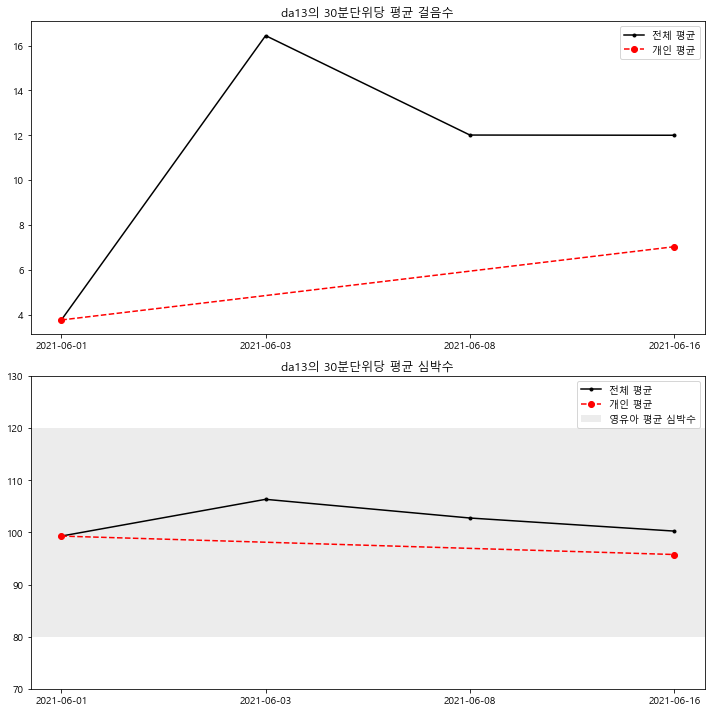

In [22]:
fig = plt.figure(figsize=(10,10))
def plot_(id):
    m_da0=all.loc[(all['ID'] == id)].reset_index(drop=True)
    m_=m_da0.loc[(m_da0['error'] == '정상')]
    al=all.loc[(all['error'] == '정상')]
    my_=m_.groupby(['Day']).mean().reset_index()
    al_=al.groupby(['Day']).mean().reset_index()
    mean_sc_da0 = int(np.mean(my_['sc_']))
    mean_hr_da0 = int(np.mean(my_['HeartRate']))
    
    for i in range(0,len(my_)):
        my_['Day'][i]=str(my_['Day'][i])
    for i in range(0,len(al_)):
        al_['Day'][i]=str(al_['Day'][i])
    

    fig.set_facecolor('white') 

    a1 = fig.add_subplot(2,1,1)
    a2 = fig.add_subplot(2,1,2)

    a1.plot(al_['Day'],al_['sc_'],'k.-',label='전체 평균')
    a1.plot(my_['Day'],my_['sc_'],'ro--',label='개인 평균')
    a2.plot(al_['Day'],al_['HeartRate'],'k.-',label='전체 평균')
    a2.plot(my_['Day'],my_['HeartRate'],'ro--',label='개인 평균')
    mea_min=80
    mea_max=120
    a2.axhspan(mea_min, mea_max, facecolor='gray', alpha=0.15,label='영유아 평균 심박수')
    #a1.set_ylim([0,1000])
    a2.set_ylim([70,130])
    a1.set_title("{}의 {}단위당 평균 걸음수".format(m_da0['ID'][0],'30분'))
    a2.set_title("{}의 {}단위당 평균 심박수".format(m_da0['ID'][0],'30분'))
    a1.legend(loc='upper right', fontsize=10) 
    a2.legend(loc='upper right', fontsize=10)
    a1.tick_params(axis='x', labelrotation=0)
    a2.tick_params(axis='x', labelrotation=0)
    fig.tight_layout()
plot_('da13')
print(mpld3.fig_to_html(fig,figid="gra"))

In [ ]:
import json

<ipython-input-15-4429a9e57f20>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_['Day'][i]=str(my_['Day'][i])
<ipython-input-15-4429a9e57f20>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  al_['Day'][i]=str(al_['Day'][i])


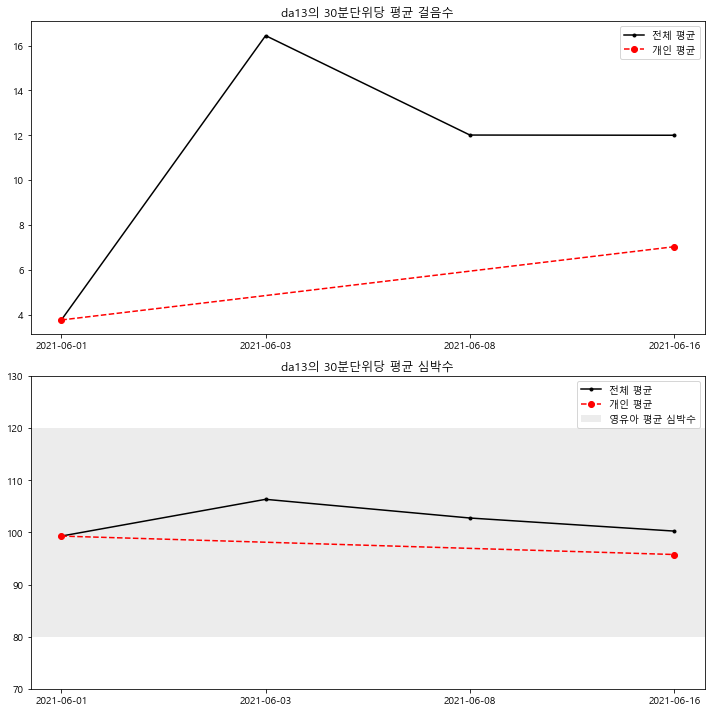

In [16]:
plot_('da13')

In [143]:
a=all['Date'].dt.day.unique()
a[9]

3

In [144]:
all.loc[all['Date'].dt.day==18]

,level_0,Date,ID,HeartRate,StepCount,DeviceWear,RSSI,GatewayTime,Day,Time,sc_,week,error
19,19,2021-06-18 11:00:00,f26e,124.200000,2047.800000,NaN,-83.600000,NaN,2021-06-18,11:00:00,413.200000,금요일,야외활동의심
20,20,2021-06-18 11:30:00,f26e,123.700000,2310.550000,NaN,-86.700000,NaN,2021-06-18,11:30:00,15.600000,금요일,야외활동의심
21,21,2021-06-18 12:00:00,f26e,101.500000,2780.625000,NaN,-83.500000,NaN,2021-06-18,12:00:00,41.500000,금요일,야외활동의심
22,22,2021-06-18 12:30:00,f26e,103.238095,3024.416667,NaN,-84.476190,NaN,2021-06-18,12:30:00,32.904762,금요일,야외활동의심
23,23,2021-06-18 13:00:00,f26e,104.976190,3268.208333,NaN,-85.452381,NaN,2021-06-18,13:00:00,24.309524,금요일,야외활동의심
24,24,2021-06-18 13:30:00,f26e,106.714286,3512.000000,NaN,-86.428571,NaN,2021-06-18,13:30:00,15.714286,금요일,야외활동의심
25,25,2021-06-18 14:00:00,f26e,94.428571,3512.000000,NaN,-87.928571,NaN,2021-06-18,14:00:00,13.395604,금요일,야외활동의심
26,26,2021-06-18 14:30:00,f26e,120.307692,3649.346154,NaN,-84.115385,NaN,2021-06-18,14:30:00,11.076923,금요일,야외활동의심
27,27,2021-06-18 15:00:00,f26e,106.842105,4085.000000,NaN,-85.684211,NaN,2021-06-18,15:00:00,41.947368,금요일,야외활동의심
76,76,2021-06-18 11:00:00,cb3d,120.750000,2079.500000,NaN,-82.750000,NaN,2021-06-18,11:00:00,59.250000,금요일,야외활동의심


In [210]:
def plot_err(id):
    m_da0=all.loc[(all['ID'] == id)].reset_index(drop=True)
    m_=m_da0.loc[(m_da0['error'] == '야외활동의심')]
    m_=m_.reset_index()
    al=all.loc[(all['error'] == '야외활동의심')]
    my_=m_.groupby(['Day']).mean().reset_index()
    al_=al.groupby(['Day']).mean().reset_index()
    mean_sc_da0 = int(np.mean(my_['sc_']))
    mean_hr_da0 = int(np.mean(my_['HeartRate']))

    for i in range(0,len(my_)):
        my_['Day'][i]=str(my_['Day'][i])
    for i in range(0,len(al_)):
        al_['Day'][i]=str(al_['Day'][i])
    fig = plt.figure(figsize=(10,10))
    fig.set_facecolor('white') 

    a1 = fig.add_subplot(2,1,1)
    a2 = fig.add_subplot(2,1,2)

    a1.plot(al_['Day'],al_['sc_'],'k.-',label='전체 평균')
    a1.plot(my_['Day'],my_['sc_'],'ro-',label='개인 평균')
    a2.plot(al_['Day'],al_['HeartRate'],'k.-',label='전체 평균')
    a2.plot(my_['Day'],my_['HeartRate'],'ro-',label='개인 평균')
    mean_sc=[0,30]
    mea_min=90
    mea_max=120
    a1.axhspan(mean_sc[0],mean_sc[1], facecolor='gray', alpha=0.15,label='평상시 평균 걸음수')
    a2.axhspan(mea_min, mea_max, facecolor='gray', alpha=0.15,label='영유아 평균 심박수')
    #a1.set_ylim([0,300])
    a2.set_ylim([80,140])
    a1.set_title("{}의 평균 걸음수({})".format(m_da0['ID'][0],m_['error'][0]))
    a2.set_title("{}의 평균 심박수({})".format(m_da0['ID'][0],m_['error'][0]))
    a1.legend(loc='upper right', fontsize=10) 
    a2.legend(loc='upper right', fontsize=10)
    a1.tick_params(axis='x', labelrotation=0)
    a2.tick_params(axis='x', labelrotation=0)
    fig.tight_layout()

In [109]:
da1313=da13.loc[da13['Date'].dt.day==1]

In [119]:
da1313.reset_index(drop=True)

,Date,ID,HeartRate,Day,Time,sc_,week,error
0,2021-06-01 12:24:00,da13,112.000000,2021-06-01,12:24:00,13.000000,화요일,정상
1,2021-06-01 12:25:00,da13,106.000000,2021-06-01,12:25:00,13.152778,화요일,정상
2,2021-06-01 12:26:00,da13,111.000000,2021-06-01,12:26:00,13.305556,화요일,정상
3,2021-06-01 12:27:00,da13,110.500000,2021-06-01,12:27:00,13.458333,화요일,정상
4,2021-06-01 12:28:00,da13,110.000000,2021-06-01,12:28:00,13.611111,화요일,정상
5,2021-06-01 12:29:00,da13,116.000000,2021-06-01,12:29:00,13.763889,화요일,정상
6,2021-06-01 12:30:00,da13,113.000000,2021-06-01,12:30:00,13.916667,화요일,정상
7,2021-06-01 12:31:00,da13,109.750000,2021-06-01,12:31:00,14.069444,화요일,정상
8,2021-06-01 12:32:00,da13,106.500000,2021-06-01,12:32:00,14.222222,화요일,정상
9,2021-06-01 12:33:00,da13,103.250000,2021-06-01,12:33:00,14.375000,화요일,정상


In [117]:
da1313=da1313.loc[da1313['Date'].dt.hour==12]

<ipython-input-120-f2e48725a9c8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_['Time'][i]=str(my_['Time'][i])
<ipython-input-120-f2e48725a9c8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  al_['Time'][i]=str(al_['Time'][i])


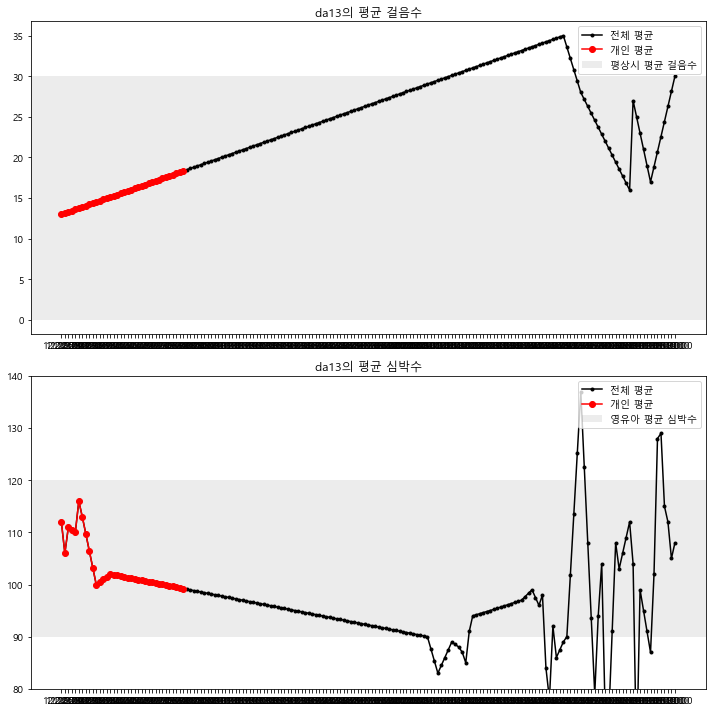

In [120]:
al=all.loc[all['Date'].dt.day==1]
my_=da1313.groupby(['Time']).mean().reset_index()
al_=al.groupby(['Time']).mean().reset_index()
mean_sc_da0 = int(np.mean(my_['sc_']))
mean_hr_da0 = int(np.mean(my_['HeartRate']))

for i in range(0,len(my_)):
    my_['Time'][i]=str(my_['Time'][i])
for i in range(0,len(al_)):
    al_['Time'][i]=str(al_['Time'][i])
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white') 

a1 = fig.add_subplot(2,1,1)
a2 = fig.add_subplot(2,1,2)

a1.plot(al_['Time'],al_['sc_'],'k.-',label='전체 평균')
a1.plot(my_['Time'],my_['sc_'],'ro-',label='개인 평균')
a2.plot(al_['Time'],al_['HeartRate'],'k.-',label='전체 평균')
a2.plot(my_['Time'],my_['HeartRate'],'ro-',label='개인 평균')
mean_sc=[0,30]
mea_min=90
mea_max=120
a1.axhspan(mean_sc[0],mean_sc[1], facecolor='gray', alpha=0.15,label='평상시 평균 걸음수')
a2.axhspan(mea_min, mea_max, facecolor='gray', alpha=0.15,label='영유아 평균 심박수')
    #a1.set_ylim([0,300])
a2.set_ylim([80,140])
a1.set_title("{}의 평균 걸음수".format('da13'))
a2.set_title("{}의 평균 심박수".format('da13'))
a1.legend(loc='upper right', fontsize=10) 
a2.legend(loc='upper right', fontsize=10)
a1.tick_params(axis='x', labelrotation=0)
a2.tick_params(axis='x', labelrotation=0)
fig.tight_layout()
plt.pause(0.001)

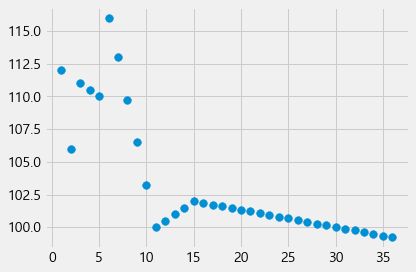

MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

In [237]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
da1313=da1313.reset_index(drop=True)
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]
x=np.array(x)
y=[]
def update(aa):
    for i in range(0,len(da1313)):
        y.append(da1313['HeartRate'][i])
    return y
sine=update(x)
plt.figure()
plt.scatter(x, sine,s=60)
ani=FuncAnimation(plt.gcf(), sine, interval=1000)
plt.tight_layout()
plt.show()
ani.save(r'animation.gif', fps=10)

In [246]:
all_30=all_m('10T')
all_30=all_30.loc[((all_30["Date"].dt.hour>=11)&(all_30["Date"].dt.minute>=0))&
            ((all_30['Date'].dt.hour<=12)&(all_30["Date"].dt.minute<=30))]
#all_30.drop('index',axis=1,inplace=True)
#all_30.drop('GatewayTime',axis=1,inplace=True)
all_30['Time']=all_30['Time'].astype(str)
all_30['Day']=all_30['Day'].astype(str)
al30=all_30.loc[all_30['Day']=='2021-06-08']    
al=all_30.groupby(['Time']).mean().reset_index()
    
my=all_30.loc[(all_30['ID'] == 'da13')].reset_index(drop=True)
my=my.groupby(['Time']).mean().reset_index()
#my
#mean_sc_da0 = int(np.mean(my['sc_']))
#mean_sc_da0
my

<ipython-input-136-a2f68e402526>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['sc_'][i+1]=int(a['StepCount'][i+1])-int(a['StepCount'][i])
<ipython-input-136-a2f68e402526>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['sc_'][i+1]=int(a['StepCount'][i+1])-int(a['StepCount'][i])
<ipython-input-136-a2f68e402526>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['sc_'][i+1]=int(a['StepCount'][i+1])-int(a['StepCount'][i])
<ipy

<ipython-input-134-4d0c557c6af1>:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_m['Day'][i]=my_m['Date'][i].date()
<ipython-input-134-4d0c557c6af1>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_m['Time'][i]=my_m['Date'][i].time()
<ipython-input-134-4d0c557c6af1>:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_m['week'][i]=days[my_m['Day'][i].weekday()]
<ipython-input-134-4d0c557c6af1>:27: SettingWithCopyWarning: 
A v

<ipython-input-134-4d0c557c6af1>:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_m['week'][i]=days[my_m['Day'][i].weekday()]
<ipython-input-134-4d0c557c6af1>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['sc_'][i+1]=int(a['StepCount'][i+1])-int(a['StepCount'][i])
<ipython-input-134-4d0c557c6af1>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['sc_'][ind[i]]=0
<ipython-input-134-4d0c557c6af1>:52: SettingWithCopyWarning: 

,Time,level_0,HeartRate,StepCount,DeviceWear,RSSI,sc_
0,11:00:00,568.666667,102.036223,3912.134921,NaN,-85.475987,518.018519
1,11:10:00,573.000000,104.450931,3220.322421,NaN,-85.524687,338.746528
2,11:20:00,574.000000,104.249298,3544.667460,NaN,-84.919963,359.425794
3,11:30:00,575.000000,107.212546,3731.253571,NaN,-85.683791,377.471429
4,12:00:00,578.000000,107.023571,4481.179286,NaN,-84.449286,88.496411
5,12:10:00,579.000000,110.136389,4688.189147,NaN,-82.593194,76.521739
6,12:20:00,567.000000,110.930476,3893.891429,NaN,-86.101905,67.443210
7,12:30:00,579.166667,110.456481,3273.033333,NaN,-84.823148,53.795837


In [20]:
def range_time(name,date,sthour,stminute,endhour,endminute,part):
    all_30=all_m(part)
    all_30=all_30.loc[((all_30["Date"].dt.hour>=sthour)&(all_30["Date"].dt.minute>=stminute))&
              ((all_30['Date'].dt.hour<=endhour)&(all_30["Date"].dt.minute<=endminute))]
    #all_30.drop('index',axis=1,inplace=True)
    #all_30.drop('GatewayTime',axis=1,inplace=True)
    all_30['Time']=all_30['Time'].astype(str)
    all_30['Day']=all_30['Day'].astype(str)
    al30=all_30.loc[all_30['Day']==date]    
    al=al30.groupby(['Time']).mean().reset_index()
    my=all_30.loc[(all_30['ID'] == name)].reset_index(drop=True)
    my=my.groupby(['Time']).mean().reset_index()

    mean_sc_da0 = int(np.mean(my['sc_']))
    mean_sc_al = int(np.mean(al['sc_']))
    mean_hr_da0 = int(np.mean(my['HeartRate']))
    mean_hr_al = int(np.mean(al['HeartRate']))

    fig = plt.figure(figsize=(10,10))
    fig.set_facecolor('white') 
    a1 = fig.add_subplot(2,1,1)
    a2 = fig.add_subplot(2,1,2)

    a1.bar(my['Time'],my['sc_'],width=0.3,label='{}의 StepCount'.format(name),color='lightcoral',align='edge')
    a1.bar(al['Time'],al['sc_'],width=-0.35,label='전체 StepCount',color='lightblue',align='edge')
    a2.bar(my['Time'],my['HeartRate'],label='{}의 HeartRate'.format(name),width=0.3,color='lightcoral',align='edge')
    a2.bar(al['Time'],al['HeartRate'],label='전체 HeartRate',width=-0.35,color='lightblue',align='edge')
    
    mea_min=90
    mea_max=150
    a2.axhspan(mea_min, mea_max, facecolor='gray', alpha=0.15,label='영유아 평균 심박수')
    
    a1.axhline(mean_sc_da0,label='{}의 StepCount'.format(name),color='lightcoral',linestyle='--',alpha=0.4)
    a1.axhline(mean_sc_al,label='전체 StepCount',linestyle='--',color='lightblue',alpha=0.4)
    a2.axhline(mean_hr_da0,label='{}의 HeartRate'.format(name),color='lightcoral',linestyle='--',alpha=0.4)
    a2.axhline(mean_hr_al,label='전체 HeartRate',linestyle='--',color='lightblue',alpha=0.4)
    a1.legend(loc='upper right', fontsize=10) 
    a2.legend(loc='upper right', fontsize=10)
    a1.set_title("{}일 {}의 평균 걸음수".format(date,name))
    a2.set_title("{}일 {}의 평균 심박수".format(date,name))
    a2.set_ylim([80,130])
    a1.tick_params(axis='x', labelrotation=40)
    a2.tick_params(axis='x', labelrotation=40)
    fig.tight_layout()

<ipython-input-10-a2f68e402526>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['sc_'][i+1]=int(a['StepCount'][i+1])-int(a['StepCount'][i])
<ipython-input-10-a2f68e402526>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['sc_'][i+1]=int(a['StepCount'][i+1])-int(a['StepCount'][i])
<ipython-input-10-a2f68e402526>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['sc_'][i+1]=int(a['StepCount'][i+1])-int(a['StepCount'][i])
<ipytho

<ipython-input-9-4d0c557c6af1>:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_m['Day'][i]=my_m['Date'][i].date()
<ipython-input-9-4d0c557c6af1>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_m['Time'][i]=my_m['Date'][i].time()
<ipython-input-9-4d0c557c6af1>:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_m['week'][i]=days[my_m['Day'][i].weekday()]
<ipython-input-9-4d0c557c6af1>:27: SettingWithCopyWarning: 
A value is 

<ipython-input-9-4d0c557c6af1>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['sc_'][ind[i]]=0
<ipython-input-9-4d0c557c6af1>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['sc_'][ind[i]]=0
<ipython-input-9-4d0c557c6af1>:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_m['Day'][i]=my_m['Date'][i].date()
<ipython-input-9-4d0c557c6af1>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

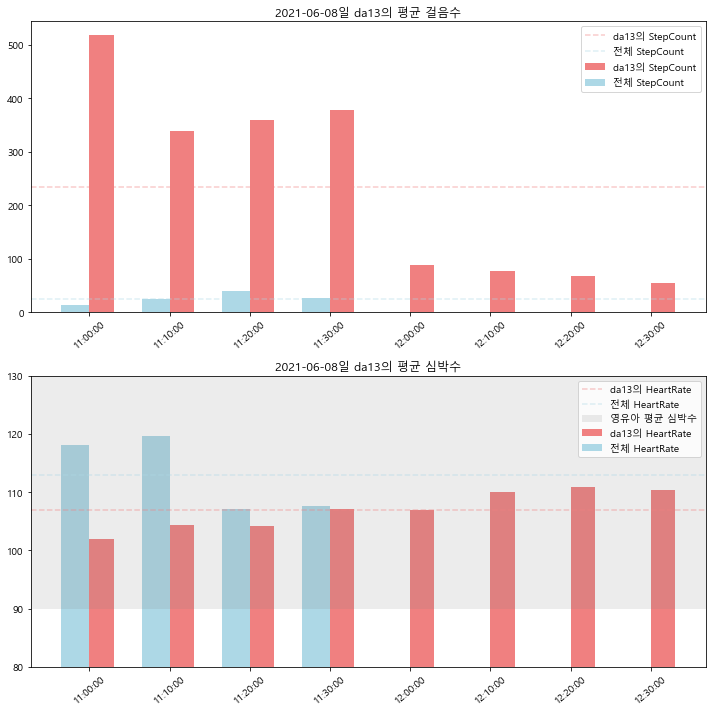

In [21]:
range_time('da13','2021-06-08',11,0,12,30,'10T')

In [22]:
def time_(id):
    m_da0=all.loc[(all['ID'] == id)].reset_index(drop=True)
    mm=m_da0.set_index('Date')
    mm.drop('DeviceWear',axis=1,inplace=True)
    mm.drop('level_0',axis=1,inplace=True)
    mm.drop('StepCount',axis=1,inplace=True)
    mm.drop('RSSI',axis=1,inplace=True)
    mm.drop('GatewayTime',axis=1,inplace=True)
    mm['2021-06-14'].plot(title = '{}의 {}일'.format(m_da0['ID'][0],'2021-06-14'))
    mm['2021-06-15'].plot(title = '{}의 {}일'.format(m_da0['ID'][0],'2021-06-15'))

<ipython-input-22-194345fd3a37>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mm['2021-06-14'].plot(title = '{}의 {}일'.format(m_da0['ID'][0],'2021-06-14'))
<ipython-input-22-194345fd3a37>:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mm['2021-06-15'].plot(title = '{}의 {}일'.format(m_da0['ID'][0],'2021-06-15'))


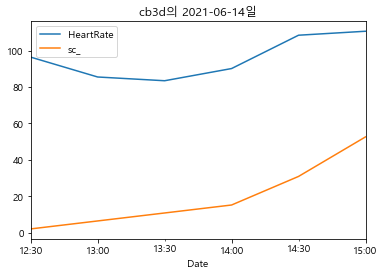

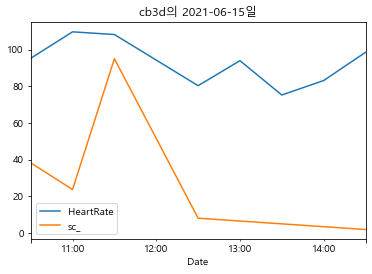

In [23]:
time_('cb3d')

# 산점도

In [172]:
def scat(id):
    m_da0=all.loc[(all['ID'] == id)].reset_index(drop=True)
    my=m_da0.groupby(['Day']).mean().reset_index()
    al=all.groupby(['Day']).mean().reset_index()
    mean_sc = int(np.mean(al['sc_']))
    mean_hr = int(np.mean(al['HeartRate']))
    fig = plt.figure(figsize=(10,13))
    a1 = fig.add_subplot(2,1,1)
    a1.plot(al['HeartRate'],al['sc_'],'k.',label='전체')
    a1.plot(my['HeartRate'],my['sc_'],'ro',label= '개인-{}'.format(m_da0['ID'][0]))
    a1.set_title('날별')
    a1.axhline(mean_sc,label='전체 평균 걸음수',color='gray', linestyle='-', linewidth=2)
    a1.axvline(mean_hr,label='전체 평균 심박수',color='gray', linestyle='-', linewidth=2)
    a1.set_xlabel('HeartRate')
    a1.set_ylabel('StepCount')
    a1.spines['right'].set_visible(False) 
    a1.spines['top'].set_visible(False)
    a1.spines['left'].set_visible(False) 
    a1.spines['bottom'].set_visible(False)
    [plt.text(my['HeartRate'][i],my['sc_'][i],my['Day'][i]) for i in range(0,len(my))]
    plt.tick_params(axis='x', labelrotation=0)
    a1.legend(loc='upper left', fontsize=10) 
    fig.tight_layout()

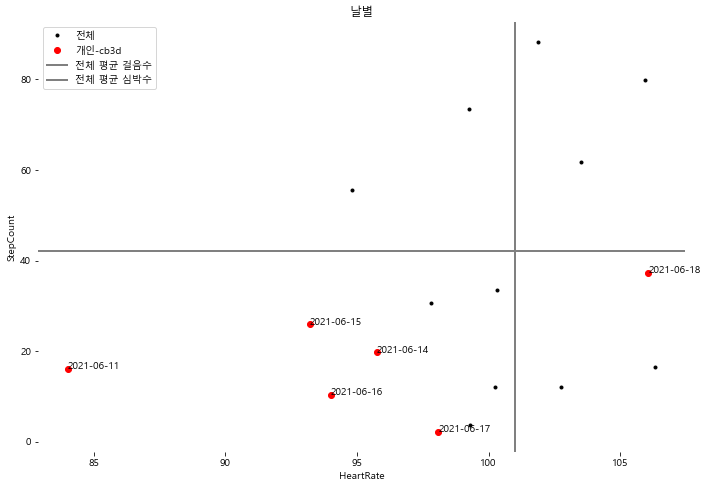

In [173]:
scat('cb3d')

# 군집화

In [161]:
from sklearn import datasets
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

Text(0.5, 1.0, '날별')

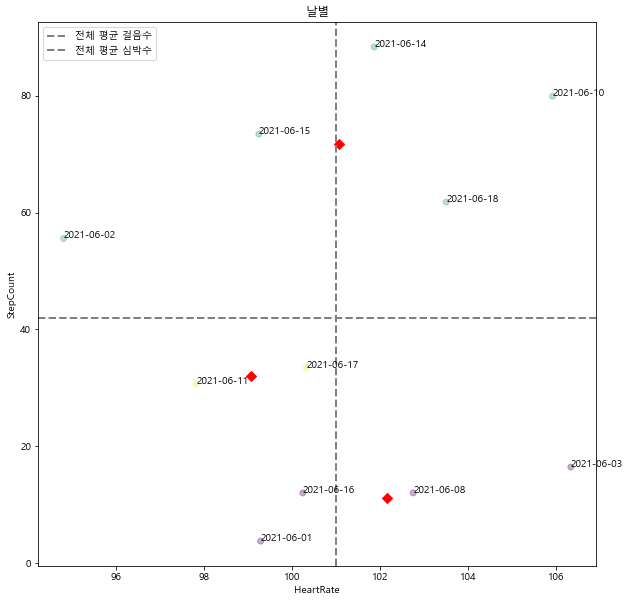

In [162]:
fig = plt.figure(figsize=(10,10))
al_=all.groupby(['Day']).mean().reset_index(drop=False)
al_1=al_.loc[:,['sc_','HeartRate']]
model = KMeans(n_clusters=3,init='k-means++', n_init=10, max_iter=300,algorithm='auto')
model.fit(al_1)
predict = pd.DataFrame(model.predict(al_1))
predict.columns=['predict']
al= pd.concat([al_,predict],axis=1)
mean_sc = int(np.mean(al['sc_']))
mean_hr = int(np.mean(al['HeartRate']))
plt.scatter(al['HeartRate'],al['sc_'],c=al['predict'],alpha=0.3)
centers = pd.DataFrame(model.cluster_centers_,columns=['HeartRate','sc_'])
center_x = centers['sc_']
center_y = centers['HeartRate']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.axhline(mean_sc,label='전체 평균 걸음수',color='gray', linestyle='--', linewidth=2)
plt.axvline(mean_hr,label='전체 평균 심박수',color='gray', linestyle='--', linewidth=2)
[plt.text(al['HeartRate'][i],al['sc_'][i],al['Day'][i]) for i in range(0,len(al))]
plt.tick_params(axis='x', labelrotation=0)
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('HeartRate')
plt.ylabel('StepCount')
plt.title("날별")

Text(0.5, 1.0, '개인별')

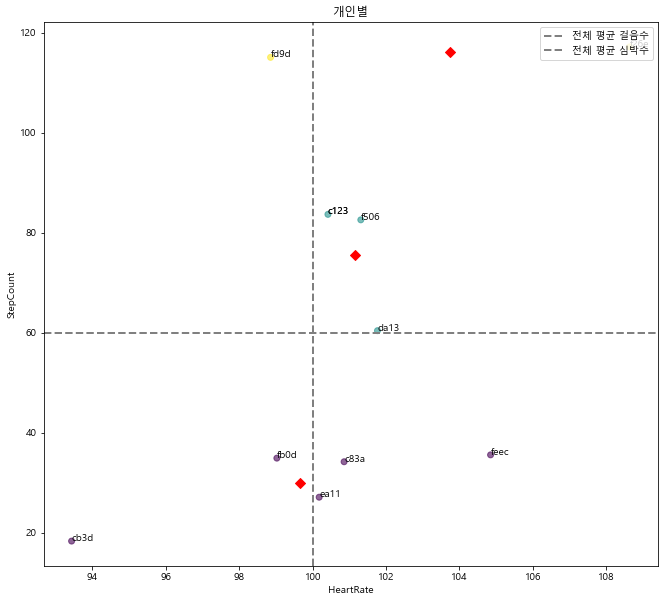

In [163]:
fig = plt.figure(figsize=(11,10))
al_=all.groupby(['ID']).mean()
al_=al_.loc[:,['sc_','HeartRate']]
model = KMeans(n_clusters=3
               ,init='k-means++', n_init=10, max_iter=300,algorithm='auto')
model.fit(al_)
predict = pd.DataFrame(model.predict(al_))
al_=al_.reset_index()
predict.columns=['predict']
al= pd.concat([al_,predict],axis=1)
mean_sc = int(np.mean(al['sc_']))
mean_hr = int(np.mean(al['HeartRate']))
plt.scatter(al['HeartRate'],al['sc_'],c=al['predict'],alpha=0.6)
centers = pd.DataFrame(model.cluster_centers_,columns=['HeartRate','sc_'])
center_x = centers['sc_']
center_y = centers['HeartRate']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.axhline(mean_sc,label='전체 평균 걸음수',color='gray', linestyle='--', linewidth=2)
plt.axvline(mean_hr,label='전체 평균 심박수',color='gray', linestyle='--', linewidth=2)
plt.tick_params(axis='x', labelrotation=0)
plt.legend(loc='upper right', fontsize=10)
[plt.text(al['HeartRate'][i],al['sc_'][i],al['ID'][i]) for i in range(0,len(al))]
plt.text(al['HeartRate'][0],al['sc_'][0],al['ID'][0])
plt.xlabel('HeartRate')
plt.ylabel('StepCount')
plt.title("개인별")

In [164]:
def km_w(id):
    m_da0=all.loc[(all['ID'] == id)].reset_index(drop=True)
    fig = plt.figure(figsize=(10,10))
    al_=m_da0.groupby(['week']).mean().reset_index(drop=False)
    al_1=al_.loc[:,['sc_','HeartRate']]
    model = KMeans(n_clusters=3,init='k-means++', n_init=10, max_iter=300,algorithm='auto')
    model.fit(al_1)
    predict = pd.DataFrame(model.predict(al_1))
    predict.columns=['predict']
    al= pd.concat([al_,predict],axis=1)
    mean_sc = int(np.mean(al['sc_']))
    mean_hr = int(np.mean(al['HeartRate']))
    plt.scatter(al['HeartRate'],al['sc_'],c=al['predict'],alpha=0.3)
    centers = pd.DataFrame(model.cluster_centers_,columns=['HeartRate','sc_'])
    center_x = centers['sc_']
    center_y = centers['HeartRate']
    plt.scatter(center_x,center_y,s=50,marker='D',c='r')
    plt.axhline(mean_sc,label='전체 평균 걸음수',color='gray', linestyle='--', linewidth=2)
    plt.axvline(mean_hr,label='전체 평균 심박수',color='gray', linestyle='--', linewidth=2)
    [plt.text(al['HeartRate'][i],al['sc_'][i],al['week'][i]) for i in range(0,len(al))]
    plt.tick_params(axis='x', labelrotation=0)
    plt.legend(loc='upper left', fontsize=10)
    plt.xlabel('HeartRate')
    plt.ylabel('StepCount')
    plt.title("{}의 요일별 군집화".format(id))

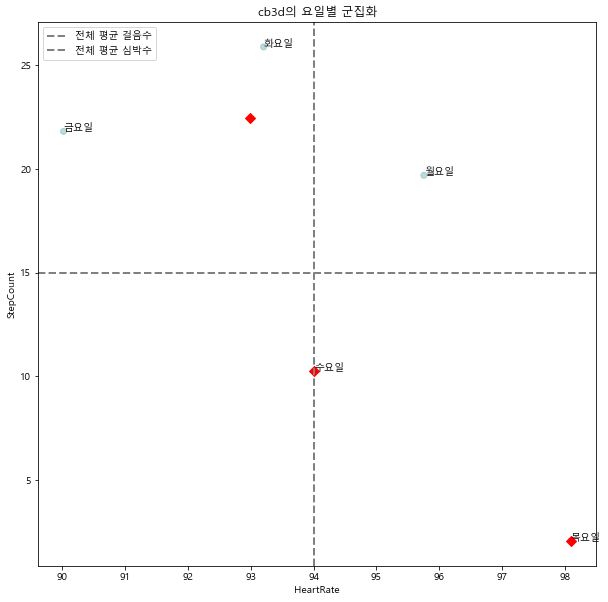

In [165]:
km_w('cb3d')

In [176]:
all

,level_0,Date,ID,HeartRate,StepCount,DeviceWear,RSSI,GatewayTime,Day,Time,sc_,week,error
0,0,2021-06-14 10:00:00,f26e,100.100000,679.600000,NaN,-85.800000,NaN,2021-06-14,10:00:00,74.200000,월요일,야외활동의심
1,1,2021-06-14 10:30:00,f26e,113.782609,815.304348,NaN,-86.434783,NaN,2021-06-14,10:30:00,10.565217,월요일,야외활동의심
2,2,2021-06-14 11:00:00,f26e,112.655172,1364.758621,NaN,-81.896552,NaN,2021-06-14,11:00:00,29.068966,월요일,야외활동의심
3,3,2021-06-14 11:30:00,f26e,122.166667,1828.000000,NaN,-88.000000,NaN,2021-06-14,11:30:00,371.534483,월요일,야외활동의심
4,4,2021-06-14 12:00:00,f26e,115.000000,2542.000000,NaN,-78.000000,NaN,2021-06-14,12:00:00,714.000000,월요일,야외활동의심
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,425,2021-06-17 14:00:00,feec,103.346154,355.730769,NaN,-85.192308,NaN,2021-06-17,14:00:00,6.846154,목요일,야외활동의심
426,426,2021-06-17 14:30:00,feec,110.875000,555.875000,NaN,-83.000000,NaN,2021-06-17,14:30:00,27.625000,목요일,야외활동의심
427,427,2021-06-18 11:00:00,feec,98.500000,2462.000000,NaN,-85.000000,NaN,2021-06-18,11:00:00,37.000000,금요일,야외활동의심
428,428,2021-06-18 11:30:00,feec,107.400000,2877.720000,NaN,-86.280000,NaN,2021-06-18,11:30:00,21.280000,금요일,야외활동의심


In [179]:
def km_d(id):
    m_da0=all.loc[(all['ID'] == id)].reset_index(drop=True)
    fig = plt.figure(figsize=(10,10))
    al_=m_da0.groupby(['Day']).mean().reset_index(drop=False)
    al_1=al_.loc[:,['sc_','HeartRate']]
    model = KMeans(n_clusters=3,init='k-means++', n_init=10, max_iter=300,algorithm='auto')
    model.fit(al_1)
    predict = pd.DataFrame(model.predict(al_1))
    predict.columns=['predict']
    al= pd.concat([al_,predict],axis=1)
    mean_sc = int(np.mean(al['sc_']))
    mean_hr = int(np.mean(al['HeartRate']))
    plt.scatter(al['HeartRate'],al['sc_'],c=al['predict'],alpha=0.3)
    centers = pd.DataFrame(model.cluster_centers_,columns=['HeartRate','sc_'])
    center_x = centers['sc_']
    center_y = centers['HeartRate']
    plt.scatter(center_x,center_y,s=50,marker='D',c='r')
    plt.axhline(mean_sc,label='전체 평균 걸음수',color='gray', linestyle='--', linewidth=2)
    plt.axvline(mean_hr,label='전체 평균 심박수',color='gray', linestyle='--', linewidth=2)
    [plt.text(al['HeartRate'][i],al['sc_'][i],al['Day'][i]) for i in range(0,len(al))]
    plt.tick_params(axis='x', labelrotation=0)
    plt.legend(loc='upper left', fontsize=10)
    plt.xlabel('HeartRate')
    plt.ylabel('StepCount')
    plt.title("{}의 날짜별 군집화".format(id))

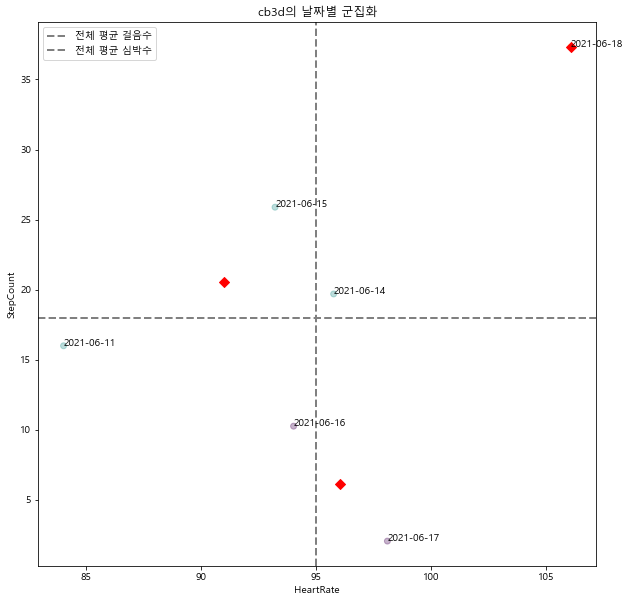

In [180]:
km_d('cb3d')

In [33]:
all

,Date,ID,HeartRate,Day,Time,sc_,week,error
0,2021-06-14 10:00:00,f26e,100.100000,2021-06-14,10:00:00,74.200000,월요일,야외활동의심
1,2021-06-14 10:30:00,f26e,113.782609,2021-06-14,10:30:00,10.565217,월요일,야외활동의심
2,2021-06-14 11:00:00,f26e,112.655172,2021-06-14,11:00:00,29.068966,월요일,야외활동의심
3,2021-06-14 11:30:00,f26e,122.166667,2021-06-14,11:30:00,371.534483,월요일,야외활동의심
4,2021-06-14 12:00:00,f26e,115.000000,2021-06-14,12:00:00,714.000000,월요일,야외활동의심
...,...,...,...,...,...,...,...,...
425,2021-06-17 14:00:00,feec,103.346154,2021-06-17,14:00:00,6.846154,목요일,야외활동의심
426,2021-06-17 14:30:00,feec,110.875000,2021-06-17,14:30:00,27.625000,목요일,야외활동의심
427,2021-06-18 11:00:00,feec,98.500000,2021-06-18,11:00:00,37.000000,금요일,야외활동의심
428,2021-06-18 11:30:00,feec,107.400000,2021-06-18,11:30:00,21.280000,금요일,야외활동의심


In [261]:
da13=all.loc[all['ID']=='da13']

In [36]:
da13['HeartRate'].mean()

101.76584369123604

In [37]:
da13['HeartRate'].max()

128.0

In [38]:
da13['HeartRate'].median()

102.0

In [39]:
da13['HeartRate'].min()

76.75

In [40]:
da13.loc[da13['HeartRate']>=100]

,Date,ID,HeartRate,Day,Time,sc_,week,error
188,2021-06-01 12:00:00,da13,111.000000,2021-06-01,12:00:00,2.600000,화요일,정상
189,2021-06-01 12:30:00,da13,105.000000,2021-06-01,12:30:00,2.980000,화요일,정상
194,2021-06-01 15:00:00,da13,101.333333,2021-06-01,15:00:00,5.000000,화요일,정상
195,2021-06-10 10:00:00,da13,117.285714,2021-06-10,10:00:00,126.423077,목요일,야외활동의심
196,2021-06-10 10:30:00,da13,109.857143,2021-06-10,10:30:00,210.846154,목요일,야외활동의심
197,2021-06-10 11:00:00,da13,102.428571,2021-06-10,11:00:00,295.269231,목요일,야외활동의심
199,2021-06-10 12:00:00,da13,107.178571,2021-06-10,12:00:00,29.821429,목요일,야외활동의심
200,2021-06-10 12:30:00,da13,128.000000,2021-06-10,12:30:00,25.000000,목요일,야외활동의심
201,2021-06-11 10:00:00,da13,102.076923,2021-06-11,10:00:00,41.846154,금요일,야외활동의심
202,2021-06-11 10:30:00,da13,102.392628,2021-06-11,10:30:00,87.381410,금요일,야외활동의심


In [41]:
da13

,Date,ID,HeartRate,Day,Time,sc_,week,error
188,2021-06-01 12:00:00,da13,111.000000,2021-06-01,12:00:00,2.600000,화요일,정상
189,2021-06-01 12:30:00,da13,105.000000,2021-06-01,12:30:00,2.980000,화요일,정상
190,2021-06-01 13:00:00,da13,99.703704,2021-06-01,13:00:00,3.360000,화요일,정상
191,2021-06-01 13:30:00,da13,94.407407,2021-06-01,13:30:00,3.740000,화요일,정상
192,2021-06-01 14:00:00,da13,89.111111,2021-06-01,14:00:00,4.120000,화요일,정상
193,2021-06-01 14:30:00,da13,94.500000,2021-06-01,14:30:00,4.500000,화요일,정상
194,2021-06-01 15:00:00,da13,101.333333,2021-06-01,15:00:00,5.000000,화요일,정상
195,2021-06-10 10:00:00,da13,117.285714,2021-06-10,10:00:00,126.423077,목요일,야외활동의심
196,2021-06-10 10:30:00,da13,109.857143,2021-06-10,10:30:00,210.846154,목요일,야외활동의심
197,2021-06-10 11:00:00,da13,102.428571,2021-06-10,11:00:00,295.269231,목요일,야외활동의심


# 응급상황의 경우 데이터 만들기........
## 조건에 대해 생각

In [ ]:
all=pd.read_csv('D:/DB/2022_ALL.csv',sep = ",")

In [14]:
import scipy.stats as ss

In [41]:
Name=all['ID'].unique()
Name[0]

'f26e'

# DB를 위한 데이터 저장
### Zscore 개인값 구하기

In [56]:
def zsc(id):
    da13=all.loc[all['ID']==id]
    da13['Zscore']=ss.zscore(da13['HeartRate'])
    da13=da13.reset_index(drop=True)
    da13['Zsc']=da13['Zscore']
    for i in range(0,len(da13)):
        if da13['Zsc'][i]>=2:
            da13['Zsc'][i]=2
        if -2 <da13['Zsc'][i]<2:
            da13['Zsc'][i]=1
        if da13['Zsc'][i]<=-2:
            da13['Zsc'][i]=0
    da13['Zsc'].astype('int')
    da13=da13.drop(['level_0','DeviceWear','RSSI','GatewayTime','StepCount','Zscore'], axis=1)
    da13 = da13[['ID', 'HeartRate', 'sc_','error','Zsc','Date','Day','Time','week']]
    da13.to_csv('DB/평택_{}.csv'.format(id), index=False, encoding='cp949')
Name=all['ID'].unique()
for i in range(len(Name)):
    zsc('{}'.format(Name[i]))

<ipython-input-56-6dd8a3a2506b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da13['Zscore']=ss.zscore(da13['HeartRate'])
<ipython-input-56-6dd8a3a2506b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da13['Zsc'][i]=1
<ipython-input-56-6dd8a3a2506b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da13['Zsc'][i]=0
<ipython-input-56-6dd8a3a2506b>:8: SettingWithCopyWarning: 

In [57]:
# 합
import csv 
import glob 
import os 
input_path = 'C:/Users/AICTTechPlan04/Desktop/신희진/DB/' 
output_file = 'all.csv' 
is_first_file = True 
for input_file in glob.glob(os.path.join(input_path, '평택_*.csv')):
    print(os.path.basename(input_file)) 
    with open(input_file, 'r', newline='', encoding='utf-8') as csv_in_file: 
        with open(output_file, 'a', newline='', encoding='utf-8') as csv_out_file: 
            freader = csv.reader(csv_in_file) 
            fwriter = csv.writer(csv_out_file) 
            if is_first_file: 
                for row in freader: 
                    fwriter.writerow(row) 
                    print(row) 
                    is_first_file = False 
            else: 
                for row in freader: 
                    fwriter.writerow(row) 
                    print(row)


평택_c123.csv
['ID', 'HeartRate', 'sc_', 'error', 'Zsc', 'Date', 'Day', 'Time', 'week']
['c123', '113.0', '22.09090909090909', 'outdoor', '1.0', '2021-06-10 11:40:00', '2021-06-10', '11:40:00', 'Thu']
['c123', '108.0909090909091', '22.09090909090909', 'outdoor', '1.0', '2021-06-10 11:50:00', '2021-06-10', '11:50:00', 'Thu']
['c123', '114.66666666666667', '35.416666666666664', 'outdoor', '1.0', '2021-06-10 12:00:00', '2021-06-10', '12:00:00', 'Thu']
['c123', '110.0', '21.833333333333332', 'outdoor', '1.0', '2021-06-10 12:10:00', '2021-06-10', '12:10:00', 'Thu']
['c123', '103.22222222222223', '23.77777777777778', 'outdoor', '1.0', '2021-06-10 12:20:00', '2021-06-10', '12:20:00', 'Thu']
['c123', '104.33333333333333', '4.166666666666667', 'outdoor', '1.0', '2021-06-10 12:30:00', '2021-06-10', '12:30:00', 'Thu']
['c123', '106.16666666666667', '2.1666666666666665', 'outdoor', '1.0', '2021-06-10 12:40:00', '2021-06-10', '12:40:00', 'Thu']
['c123', '100.6', '2.392361111111111', 'outdoor', '1.0',

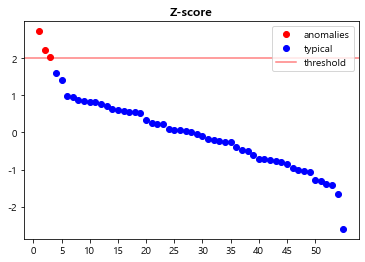

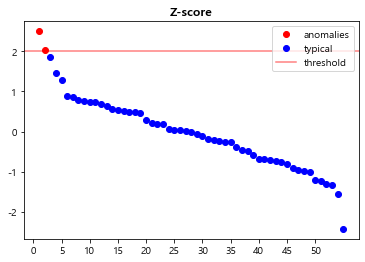

In [35]:

def plot_anomaly_Hr(data, threshold, title='Z-score'):
    score_data=data.sort_values(ascending=False).values
    ranks=np.linspace(1, len(score_data),len(score_data))
    mask_outlier=(score_data>threshold)
    plt.figure()
    plt.plot(ranks[mask_outlier],score_data[mask_outlier],'o',color='r', label='anomalies')
    plt.plot(ranks[~mask_outlier],score_data[~mask_outlier],'o',color='b', label='typical')
    plt.axhline(threshold, color='r',label='threshold',alpha=0.5)
    plt.legend(loc='upper right')
    plt.title(title,fontweight='bold')
    plt.xticks(np.arange(0,len(score_data),step=5))
    plt.show()    
def modi_zscore(data):
    median_data = np.median(data)
    mad=np.median(data.map(lambda x: np.abs(x-median_data)))
    modified_z_score = data.map(lambda x: 0.6745*(x-median_data)/mad)
    return modified_z_score
plot_anomaly_Hr(da13['Zscore'],2)
plot_anomaly_Hr(modi_zscore(da13['Zscore']),2)
b=list(da13['Zsc'].astype('int'))
b=np.array(b)

In [17]:
da13['Zscore']=ss.zscore(da13['HeartRate'])

<ipython-input-17-73fcefb7d3eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da13['Zscore']=ss.zscore(da13['HeartRate'])


In [18]:
def plot_anomaly_Hr(data, threshold, title='Z-score'):
    score_data=data.sort_values(ascending=False).values
    ranks=np.linspace(1, len(score_data),len(score_data))
    mask_outlier=(score_data>threshold)
    plt.figure()
    plt.plot(ranks[mask_outlier],score_data[mask_outlier],'o',color='r', label='anomalies')
    plt.plot(ranks[~mask_outlier],score_data[~mask_outlier],'o',color='b', label='typical')
    plt.axhline(threshold, color='r',label='threshold',alpha=0.5)
    plt.legend(loc='upper right')
    plt.title(title,fontweight='bold')
    plt.xticks(np.arange(0,len(score_data),step=5))
    plt.show()    

In [ ]:
def modi_zscore(data):
    median_data = np.median(data)
    mad=np.median(data.map(lambda x: np.abs(x-median_data)))
    modified_z_score = data.map(lambda x: 0.6745*(x-median_data)/mad)
    return modified_z_score

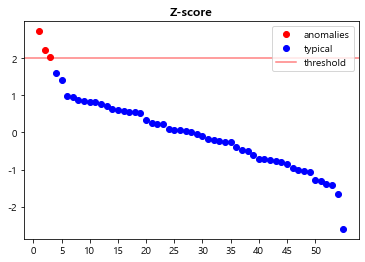

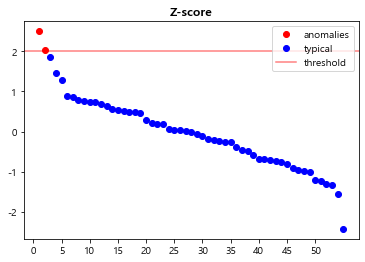

In [21]:
plot_anomaly_Hr(da13['Zscore'],2)
plot_anomaly_Hr(modi_zscore(da13['Zscore']),2)

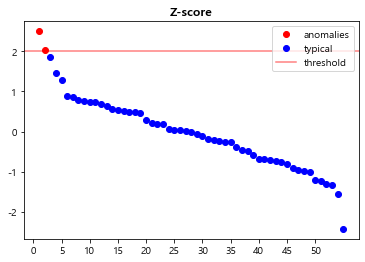

In [23]:
plot_anomaly_Hr(modi_zscore(da13['Zscore']),2)

In [ ]:
def get_lower_upper_bound(data):
    data1 = np.percentile(data, 25) # 하위 25
    data2 = np.percentile(data, 75) # 상위 25
    interquantile_range = data2-data1
    lower_bound = data1 - (interquantile_range*1.5) # 1.5배가 넘어서는걸을 이상치로 판단
    upper_bound = data3 + (interquantile_range*1.5)
    return lower_bound, upper_bound
def get_outliers_iqr(data):
    lower_bound, upper_bound=get_lower_upper_bound(data)
    outliers_iqr=data[np.where((data > upper_bound) | (data <lower_bound))]
    return outliers_iqr

In [26]:
da13=da13.reset_index(drop=True)
a=[]
for i in range(0,len(da13)):
    a.append([da13['HeartRate'][i],da13['sc_'][i]])
a=np.array(a)
da13['Zsc']=da13['Zscore']
for i in range(0,len(da13)):
    if da13['Zsc'][i]>=2:
        da13['Zsc'][i]=2
    if -2 <da13['Zsc'][i]<2:
        da13['Zsc'][i]=1
    if da13['Zsc'][i]<=-2:
        da13['Zsc'][i]=0
da13['Zsc'].astype('int')
b=list(da13['Zsc'].astype('int'))
b=np.array(b)

In [18]:
da13=da13.reset_index(drop=True)
aa=[]
aa=list(da13['HeartRate'].astype('int'))
aa=np.reshape(aa, (-1, 1))
da13['Zsc']=da13['Zscore']
for i in range(0,len(da13)):
    if da13['Zsc'][i]>=2:
        da13['Zsc'][i]=2
    if -2 <da13['Zsc'][i]<2:
        da13['Zsc'][i]=1
    if da13['Zsc'][i]<=-2:
        da13['Zsc'][i]=0
da13['Zsc'].astype('int')
b=list(da13['Zsc'].astype('int'))
b=np.array(b)

<ipython-input-18-55990f7c6701>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da13['Zsc'][i]=1
<ipython-input-18-55990f7c6701>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da13['Zsc'][i]=2
<ipython-input-18-55990f7c6701>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da13['Zsc'][i]=0


In [20]:
b

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# NB

In [92]:
x_train

array([[ 89],
       [ 96],
       [105],
       [101],
       [104],
       [107],
       [104],
       [ 94],
       [121],
       [ 99],
       [102],
       [109],
       [109],
       [117],
       [ 76],
       [106],
       [ 94],
       [ 89],
       [111],
       [ 93],
       [115],
       [102],
       [ 91],
       [107],
       [ 94],
       [ 88],
       [102],
       [109],
       [108],
       [ 85],
       [110],
       [ 88],
       [107],
       [ 99],
       [123],
       [ 99],
       [ 99],
       [ 91]])

In [70]:
from sklearn.naive_bayes import GaussianNB # model 생성
from sklearn.model_selection import train_test_split # train/test set
from sklearn.metrics import accuracy_score, confusion_matrix # model 평가

# y변수 : 다항분류

# 1. data loading & 변수 생성
X=a
y=b

# 2. train/test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
# 랜덤하게 샘플링하되 특정 번호를 지정함으로써 반복해서 시도하더라도 항상 같도록!

x_train.shape 
y_train.shape 

# 3. model
model = GaussianNB()
model.fit(X=x_train, y=y_train)


# 4. model 평가
y_pred = model.predict(x_test) # 예측치
y_true = y_test # 정답

# 분류정확도 - accuracy_score 함수 사용해서 구하기
acc = accuracy_score(y_true, y_pred)
acc # 0.9411764705882353

con_mat = confusion_matrix(y_true, y_pred)
con_mat
'''
array([[16,  0],
       [ 1,  0]], dtype=int64)
'''

y_true[:]  
y_pred[:]  


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [93]:
from sklearn.naive_bayes import GaussianNB # model 생성
from sklearn.model_selection import train_test_split # train/test set
from sklearn.metrics import accuracy_score, confusion_matrix # model 평가

# y변수 : 다항분류

# 1. data loading & 변수 생성
X=aa
y=b



# 2. train/test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
# 랜덤하게 샘플링하되 특정 번호를 지정함으로써 반복해서 시도하더라도 항상 같도록!

x_train.shape # (105, 4)
y_train.shape # (105,)


# 3. model
model = GaussianNB()
model.fit(X=x_train, y=y_train)


# 4. model 평가
y_pred = model.predict(x_test) # 예측치
y_true = y_test # 정답

# 분류정확도 - accuracy_score 함수 사용해서 구하기
acc = accuracy_score(y_true, y_pred)
acc # 0.9411764705882353

con_mat = confusion_matrix(y_true, y_pred)
con_mat
'''
array([[16,  0],
       [ 1,  0]], dtype=int64)
'''

y_true[:]  #array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])
y_pred[:]  #array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [97]:
type(con_mat) # numpy.ndarray
con_mat.shape # (2, 2)
# 분류정확도 - 식을 통해 구하기
acc = (con_mat[0,0] + con_mat[1,1]) / len(y_true)
acc # 0.9411764705882353

0.9411764705882353

In [98]:
y_true[:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

# SVC

In [99]:
from sklearn.svm import SVC # model 생성
from sklearn.model_selection import train_test_split # train/test set
from sklearn.metrics import accuracy_score, confusion_matrix # model 평가

# y변수 : 다항분류

# 1. data loading & 변수 생성
X=aa
y=b
 


# 2. train/test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
# 랜덤하게 샘플링하되 특정 번호를 지정함으로써 반복해서 시도하더라도 항상 같도록!

x_train.shape # (105, 4)
y_train.shape # (105,)

 


# 3. model
help(SVC)
model = SVC()  # kernel = 'rbf'  : default
# 데이터의 특징 때문에 분류정확도가 낮게 나오면 다른 커널 함수를 인수로 지정할 수 있음
# 'linear', 'poly', 'rbf', 'sigmoid' 등

 

model.fit(X=x_train, y=y_train)


# 4. model 평가
y_pred = model.predict(x_test) # 예측치
y_true = y_test # 정답

# 분류정확도 - accuracy_score 함수 사용해서 구하기
acc = accuracy_score(y_true, y_pred)
acc # 0.9411764705882353

con_mat = confusion_matrix(y_true, y_pred)
con_mat
'''
array([[16,  0],
       [ 1,  0]], dtype=int64)
'''
y_true[:10]  # [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y_pred[:10]  # [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  

type(con_mat) # numpy.ndarray
con_mat.shape # (3, 3)

# 분류정확도 - 식을 통해 구하기
acc = (con_mat[0,0] + con_mat[1,1]) / len(y_true)
acc # 1.0

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

1.0

In [77]:
model.predict([[125],[98]])

array([2, 1])

In [78]:
y_pred[:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [40]:
x_test

array([[ 98.        , 104.6       ],
       [ 92.15384615,  18.38095238],
       [107.17857143,  29.82142857],
       [103.86666667, 172.9125    ],
       [107.8       , 225.8       ],
       [ 97.        ,   4.35      ],
       [ 97.25      , 104.6       ],
       [102.        , 104.6       ],
       [102.07692308,  41.84615385],
       [ 92.55555556,  11.59411765],
       [ 99.5       ,  32.50147059],
       [111.        ,   2.6       ],
       [ 94.5       ,   4.5       ],
       [ 95.        , 379.69230769],
       [100.95652174,   2.7826087 ],
       [109.85714286, 210.84615385],
       [128.        ,  25.        ]])

In [228]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [193]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [48]:
lg_pred = lg.predict(X)
lg_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
da13

,level_0,Date,ID,HeartRate,StepCount,DeviceWear,RSSI,GatewayTime,Day,Time,sc_,week,error,Zscore,Zsc
0,188,2021-06-01 12:00:00,da13,111.000000,13.000000,NaN,-86.400000,NaN,2021-06-01,12:00:00,2.600000,화요일,정상,0.959958,1.0
1,189,2021-06-01 12:30:00,da13,105.000000,13.000000,NaN,-90.333333,NaN,2021-06-01,12:30:00,2.980000,화요일,정상,0.336214,1.0
2,190,2021-06-01 13:00:00,da13,99.703704,13.000000,NaN,-89.925926,NaN,2021-06-01,13:00:00,3.360000,화요일,정상,-0.214375,1.0
3,191,2021-06-01 13:30:00,da13,94.407407,13.000000,NaN,-89.518519,NaN,2021-06-01,13:30:00,3.740000,화요일,정상,-0.764964,1.0
4,192,2021-06-01 14:00:00,da13,89.111111,13.000000,NaN,-89.111111,NaN,2021-06-01,14:00:00,4.120000,화요일,정상,-1.315553,1.0
5,193,2021-06-01 14:30:00,da13,94.500000,36.000000,NaN,-84.285714,NaN,2021-06-01,14:30:00,4.500000,화요일,정상,-0.755338,1.0
6,194,2021-06-01 15:00:00,da13,101.333333,114.777778,NaN,-87.388889,NaN,2021-06-01,15:00:00,5.000000,화요일,정상,-0.044963,1.0
7,195,2021-06-10 10:00:00,da13,117.285714,3674.027473,NaN,-84.986264,NaN,2021-06-10,10:00:00,126.423077,목요일,야외활동의심,1.613405,1.0
8,196,2021-06-10 10:30:00,da13,109.857143,4870.197802,NaN,-85.401099,NaN,2021-06-10,10:30:00,210.846154,목요일,야외활동의심,0.841150,1.0
9,197,2021-06-10 11:00:00,da13,102.428571,6066.368132,NaN,-85.815934,NaN,2021-06-10,11:00:00,295.269231,목요일,야외활동의심,0.068895,1.0


# 로지스틱

In [21]:
# 심박수+걸음수
da13=da13.reset_index(drop=True)
a=[]
for i in range(0,len(da13)):
    a.append([da13['HeartRate'][i],da13['sc_'][i]])
a=np.array(a)
da13['Zsc']=da13['Zscore']
for i in range(0,len(da13)):
    if da13['Zsc'][i]>=2:
        da13['Zsc'][i]=2
    if -2 <da13['Zsc'][i]<2:
        da13['Zsc'][i]=1
    if da13['Zsc'][i]<=-2:
        da13['Zsc'][i]=0
da13['Zsc'].astype('int')
b=list(da13['Zsc'].astype('int'))
b=np.array(b)

<ipython-input-21-aaf350474ed7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da13['Zsc'][i]=1
<ipython-input-21-aaf350474ed7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da13['Zsc'][i]=2
<ipython-input-21-aaf350474ed7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da13['Zsc'][i]=0


In [86]:
#심박수만
da13=da13.reset_index(drop=True)
aa=[]
aa=list(da13['HeartRate'].astype('int'))
aa=np.reshape(aa, (-1, 1))
da13['Zsc']=da13['Zscore']
for i in range(0,len(da13)):
    if da13['Zsc'][i]>=2:
        da13['Zsc'][i]=2
    if -2 <da13['Zsc'][i]<2:
        da13['Zsc'][i]=1
    if da13['Zsc'][i]<=-2:
        da13['Zsc'][i]=0
da13['Zsc'].astype('int')
b=list(da13['Zsc'].astype('int'))
b=np.array(b)

<ipython-input-86-55990f7c6701>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da13['Zsc'][i]=1
<ipython-input-86-55990f7c6701>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da13['Zsc'][i]=2
<ipython-input-86-55990f7c6701>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da13['Zsc'][i]=0


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg=LogisticRegression()
lg.fit(X,y)
lg_pred = lg.predict(X)
print('정확도 :',accuracy_score(y, lg_pred)*100,"%")

정확도 : 100.0 %


In [88]:
import statsmodels.api as sm
# logistic regression
feature = da13['HeartRate']
output = da13['Zsc']
model = sm.formula.glm("output ~ feature", da13, family = sm.families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 output   No. Observations:                   55
Model:                            GLM   Df Residuals:                       53
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 24 Nov 2021   Deviance:                       316.68
Time:                        17:57:31   Pearson chi2:                 1.80e+16
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.141e+16   9.62e+07  -1.19e+08      0.0

C:\Users\AICTTechPlan04\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\AICTTechPlan04\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\AICTTechPlan04\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +


In [89]:
feature = da13['sc_']
output = da13['Zsc']
model = sm.formula.glm("output ~ feature", da13, family = sm.families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 output   No. Observations:                   55
Model:                            GLM   Df Residuals:                       53
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Wed, 24 Nov 2021   Deviance:                       316.68
Time:                        17:57:33   Pearson chi2:                 1.80e+16
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.823e+15   1.15e+07   1.58e+08      0.0

C:\Users\AICTTechPlan04\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


In [84]:
np.exp(model.params) # Given an offer, the likelihood of 

C:\Users\AICTTechPlan04\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Intercept    0.0
feature      inf
dtype: float64

odds(θ)= 
(1−θ)
θ
​
 = 
1−( 
1+exp(−η)
1
​
 )
1+exp(−η)
1
​
 
​
 = 
( 
1+exp(−η)
1+exp(−η)−1
​
 )
1+exp(−η)
1
​
 
​
 = 
exp(−η)
1
​
 =exp(η)

다시 오즈의 개념을 살펴보자. 오즈는 성공할 확률과 실패할 확률의 비이다. 오즈의 결정 경계(decision threshold)는 1이다. 즉, 오즈비를 해석하자면 번들을 제공했을 때의 오즈비가 1.475196으로 1보다 크므로 번들을 제공함에 따라 티켓 판매 여부에 증가함을 의미한다(정확히는 1.475196배 늘어난다).